In [211]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [212]:
import wine
import random
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [213]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [214]:
def formatInputData():
    df = pd.DataFrame([map(float, data_point.strip().split(",")) for data_point in wine.data], columns=wine.columns)
    return df

In [215]:
def sortAndTakeTopN(group_data, column_name, n, ascending=False):
    group_data = group_data.sort_values(column_name, ascending=ascending)
    group_data = group_data[:n]
    return group_data

In [216]:
def getNHighestByColumnValueInEachCategory(df, column_name, n):
    grouped_by_type = df.groupby(["Wine_Type"])
    return grouped_by_type.apply(lambda x: sortAndTakeTopN(x, column_name, n)).reset_index(drop=True)

In [217]:
def z_score_normalize(dataset, columns_to_normalize):
    for column in columns_to_normalize:
        mean = dataset[column].mean()
        std = dataset[column].std(ddof=0)
        dataset[column] = (dataset[column] - mean) / std
    return dataset

In [218]:
df = formatInputData()

# Solution A

In [219]:
top_3_df = getNHighestByColumnValueInEachCategory(df, "Alcohol", 3)
print "The following table shows the color intensity of the 3 wines in each category with the greatest alcohol content\n"
print top_3_df[["Wine_Type", "Alcohol", "Color_intensity"]] # Pass only the "Color_intensity" to remove other columns from the output

The following table shows the color intensity of the 3 wines in each category with the greatest alcohol content

   Wine_Type  Alcohol  Color_intensity
0        1.0    14.83             5.20
1        1.0    14.75             5.40
2        1.0    14.39             5.25
3        2.0    13.86             3.38
4        2.0    13.67             3.80
5        2.0    13.49             3.74
6        3.0    14.34            13.00
7        3.0    14.16             9.70
8        3.0    14.13             9.20


# Solution B

In [220]:
columns_to_normalize = list(df.columns)
columns_to_normalize.remove('Wine_Type')
normalized_df = z_score_normalize(df, columns_to_normalize)

# Solution C

In [ ]:

# Calculated the cosine similarity of each point with other points in the dataset and taken the average over the
# points of same wine type.

# So in the output it can be seen that the datapoints belonging to wine type 1 will have large cosine similarity
# with class 1 points as compared to other class points. And the same is true for the other classes as well.

# Please see the plot below.

In [204]:
def calculateSimilarity(original_df, group):
    return cosine_similarity(original_df, group).mean(axis=1)

In [205]:
grouped_normalized_df = normalized_df.groupby('Wine_Type')
similarity_df = normalized_df.copy()
similarity_columns = {}
for name, group in grouped_normalized_df:
    col_name = "Similarity_With_Class_" + str(name)
    similarity_columns[name] = col_name
    similarity_df[col_name] = calculateSimilarity(normalized_df, group)

In [206]:
similarity_df.head()

,Wine_Type,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,Similarity_With_Class_1.0,Similarity_With_Class_2.0,Similarity_With_Class_3.0
0,1.0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0.689561,-0.045552,-0.215784
1,1.0,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0.532997,0.123512,-0.183840
2,1.0,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0.619199,0.021395,-0.167735
3,1.0,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0.700964,-0.153483,-0.161238
4,1.0,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0.394981,0.080307,0.058652


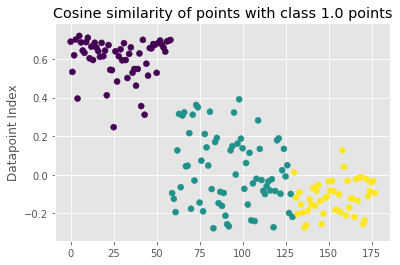

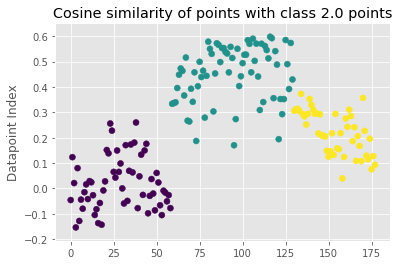

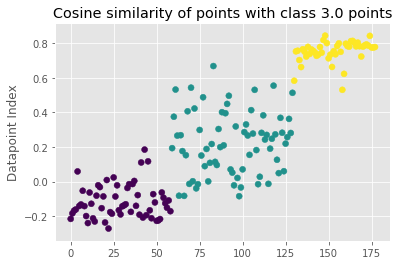

In [210]:
x_axis = range(similarity_df.shape[0])
for class_name in similarity_columns:
    plt.scatter(x_axis, similarity_df[similarity_columns[class_name]], c=similarity_df['Wine_Type'])
    plt.title("Cosine similarity of points with class " + str(class_name) + " points")
    plt.ylabel("Similarity")
    plt.ylabel("Datapoint Index")
    plt.show()

# Alternate Solution Part C

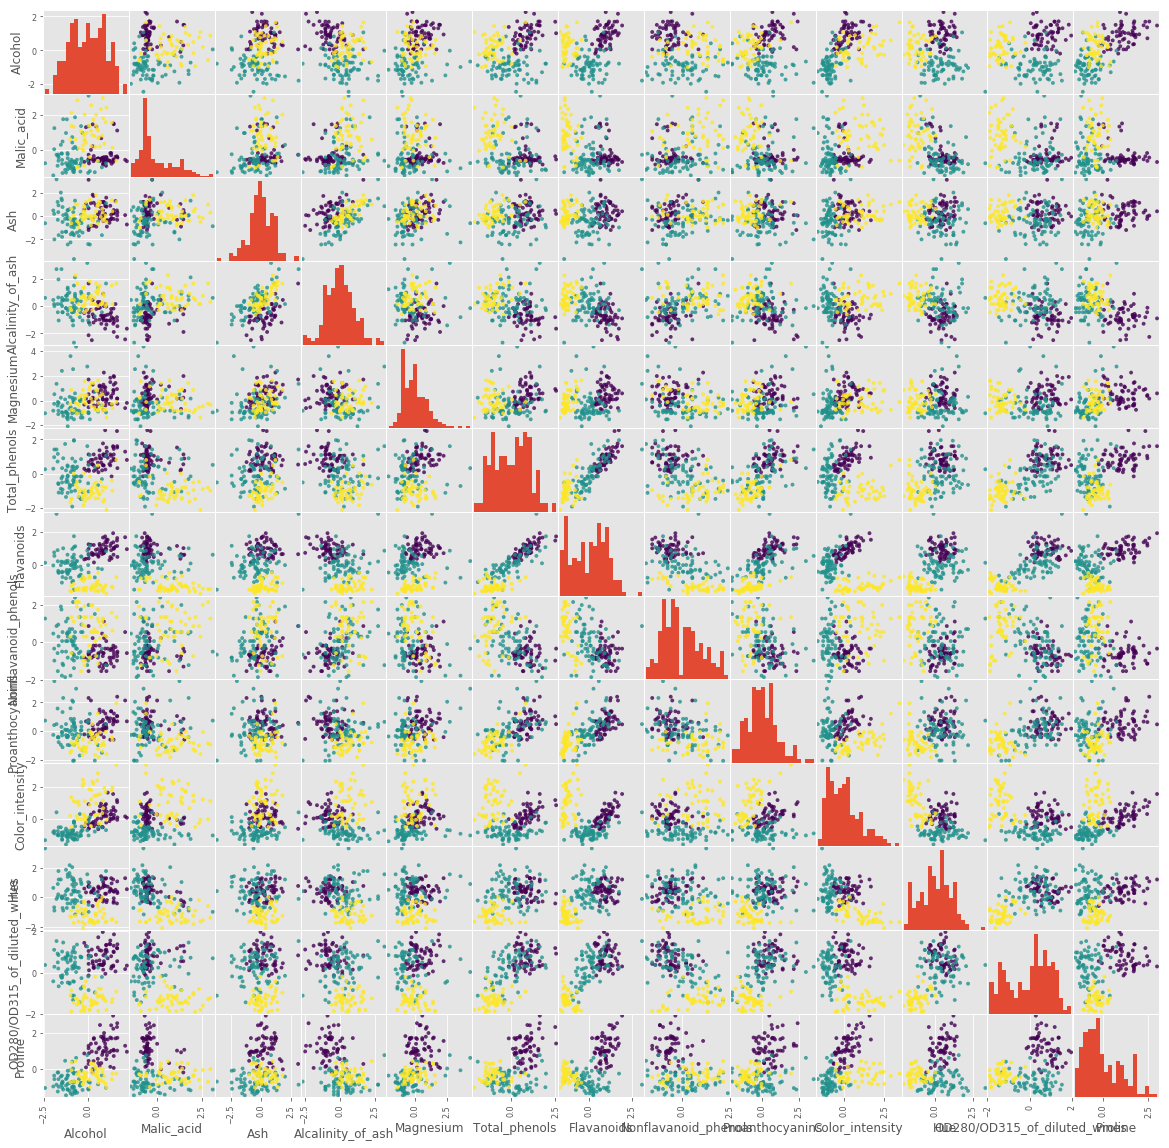

In [221]:
# Another solution for part C. This gives a visual view that for a prticular chemical, the datapoints
# beloging to same class are packed closely as compared with the points of the other class.

grr = pd.plotting.scatter_matrix(normalized_df[columns_to_normalize], c=normalized_df['Wine_Type'], figsize=(20, 20), marker='.', hist_kwds={'bins': 20}, s=60, alpha=.8)